In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Get current working directory
current_path = os.getcwd()
# Go back one step (parent directory)
project_root = os.path.dirname(current_path)
# Build CSV path
csv_path = os.path.join(project_root, 'Data', 'processed', 'processed_df.csv')
# Load CSV
df = pd.read_csv(csv_path)
print(f"CSV loaded from: {csv_path}")

CSV loaded from: c:\Users\Dell\OneDrive\Desktop\Yerevan-Flat-Price-Prediction\Data\processed\processed_df.csv


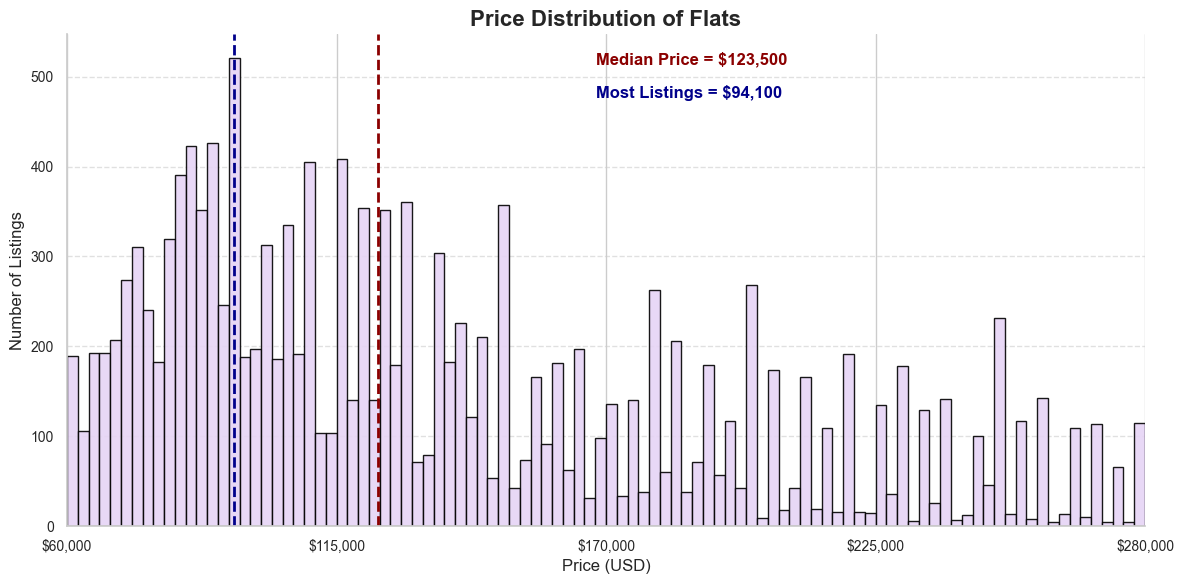

In [3]:
sns.set(style="whitegrid")

# Price values
min_price = df["Price"].min()
max_price = df["Price"].max()
x_ticks = np.linspace(min_price, max_price, 5)
median_price = df["Price"].median()

# Compute histogram data
counts, bin_edges = np.histogram(df["Price"], bins=100)
max_bin_index = np.argmax(counts)  # index of the bin with most listings
most_listed_price = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(
    df["Price"],
    bins=100,
    color="#e6d4f5",  # pastel purple
    edgecolor="black",
    alpha=0.9
)

# Lines for median and most listed price
plt.axvline(median_price, color="darkred", linestyle="--", linewidth=2, label="Median")
plt.axvline(most_listed_price, color="darkblue", linestyle="--", linewidth=2, label="Most Listings")

# Text annotations
plt.text(
    max_price * 0.60,
    plt.ylim()[1] * 0.94,
    f"Median Price = ${int(median_price):,}",
    fontsize=12,
    color="darkred",
    fontweight='bold'
)
plt.text(
    max_price * 0.60,
    plt.ylim()[1] * 0.87,
    f"Most Listings = ${int(most_listed_price):,}",
    fontsize=12,
    color="darkblue",
    fontweight='bold'
)

# Axis settings
plt.xticks(x_ticks, labels=[f"${int(x):,}" for x in x_ticks], fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(min_price, max_price)

# Titles and grid
plt.title("Price Distribution of Flats", fontsize=16, fontweight='bold')
plt.xlabel("Price (USD)", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()

plt.tight_layout()
plt.show()

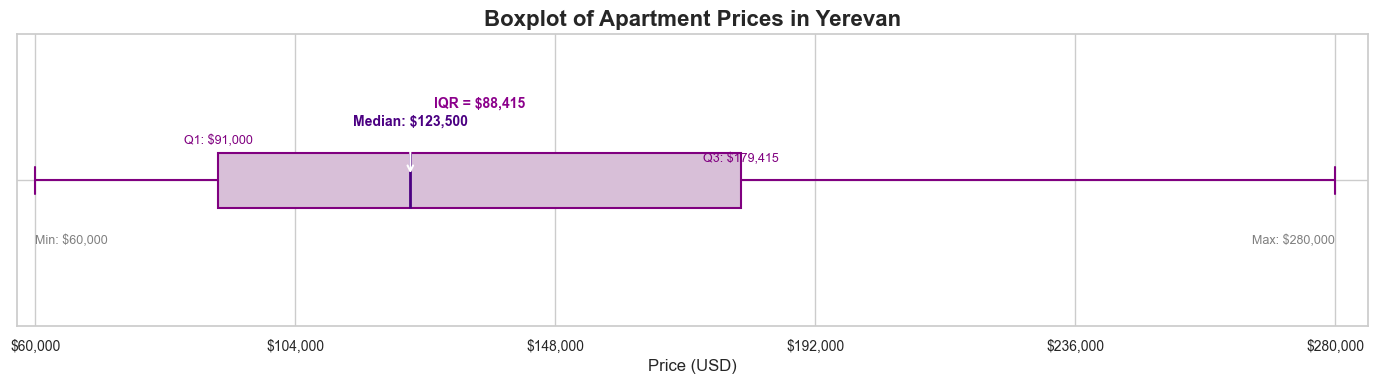

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare values
prices = df["Price"]
median = prices.median()
min_price = prices.min()
max_price = prices.max()
q1 = prices.quantile(0.25)
q3 = prices.quantile(0.75)
iqr = q3 - q1

# Style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 4))

# Boxplot
plt.boxplot(
    prices,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='thistle', color='purple', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='purple', markeredgecolor='purple', alpha=0.5),
    medianprops=dict(color='indigo', linewidth=2),
    whiskerprops=dict(color='purple', linewidth=1.5),
    capprops=dict(color='purple', linewidth=1.5)
)

# Titles and labels
plt.title("Boxplot of Apartment Prices in Yerevan", fontsize=16, fontweight='bold')
plt.xlabel("Price (USD)", fontsize=12)

# X ticks
ticks = np.linspace(min_price, max_price, 6)
plt.xticks(ticks, [f"${int(x):,}" for x in ticks], fontsize=10)
plt.yticks([1], [""])  # single line

# Median annotation
plt.annotate(f"Median: ${int(median):,}",
             xy=(median, 1.0), xytext=(median, 1.15),
             arrowprops=dict(facecolor='indigo', arrowstyle='->', linewidth=1.5, shrinkA=0, shrinkB=5),
             ha='center', fontsize=10, color='indigo', fontweight='bold')

# Min, Max
plt.text(min_price, 0.85, f"Min: ${int(min_price):,}", fontsize=9, color='gray', ha='left', va='top')
plt.text(max_price, 0.85, f"Max: ${int(max_price):,}", fontsize=9, color='gray', ha='right', va='top')

# IQR, Q1, Q3
plt.text((q1 + q3) / 2, 1.20, f"IQR = ${int(iqr):,}", color='darkmagenta', fontsize=10, ha='center', fontweight='bold')
plt.text(q1, 1.10, f"Q1: ${int(q1):,}", color='purple', fontsize=9, ha='center')
plt.text(q3, 1.05, f"Q3: ${int(q3):,}", color='purple', fontsize=9, ha='center')

# Layout
plt.xlim(min_price * 0.95, max_price * 1.02)
plt.ylim(0.6, 1.4)
plt.tight_layout()
plt.show()

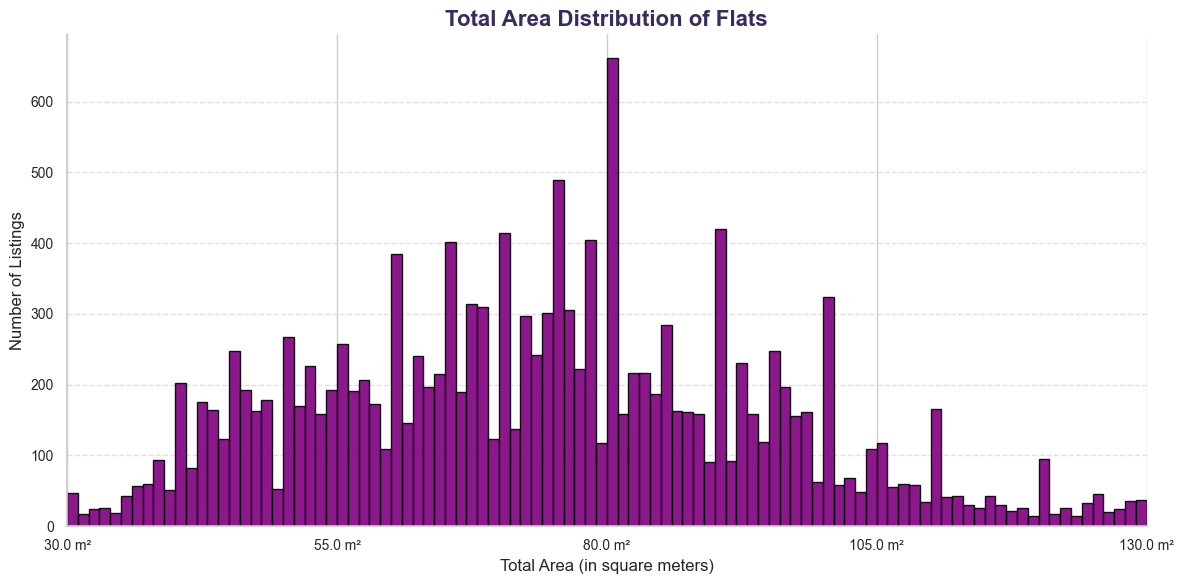

In [5]:
sns.set(style="whitegrid")

# Define min/max area
min_area = df["Total Area"].min()
max_area = df["Total Area"].max()
x_ticks = np.linspace(min_area, max_area, 5)

# Plot setup
plt.figure(figsize=(12, 6))
plt.hist(df["Total Area"], bins=100, color="purple", edgecolor="black", alpha=0.9)

# Axis ticks and labels
plt.xticks(x_ticks, labels=[f"{float(x)} m²" for x in x_ticks], fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(min_area, max_area)

# Titles and labels
plt.title("Total Area Distribution of Flats", fontsize=16, fontweight='bold', color="#3a2b5e")
plt.xlabel("Total Area (in square meters)", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)

# Grid and style
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()

# Final layout
plt.tight_layout()
plt.show()

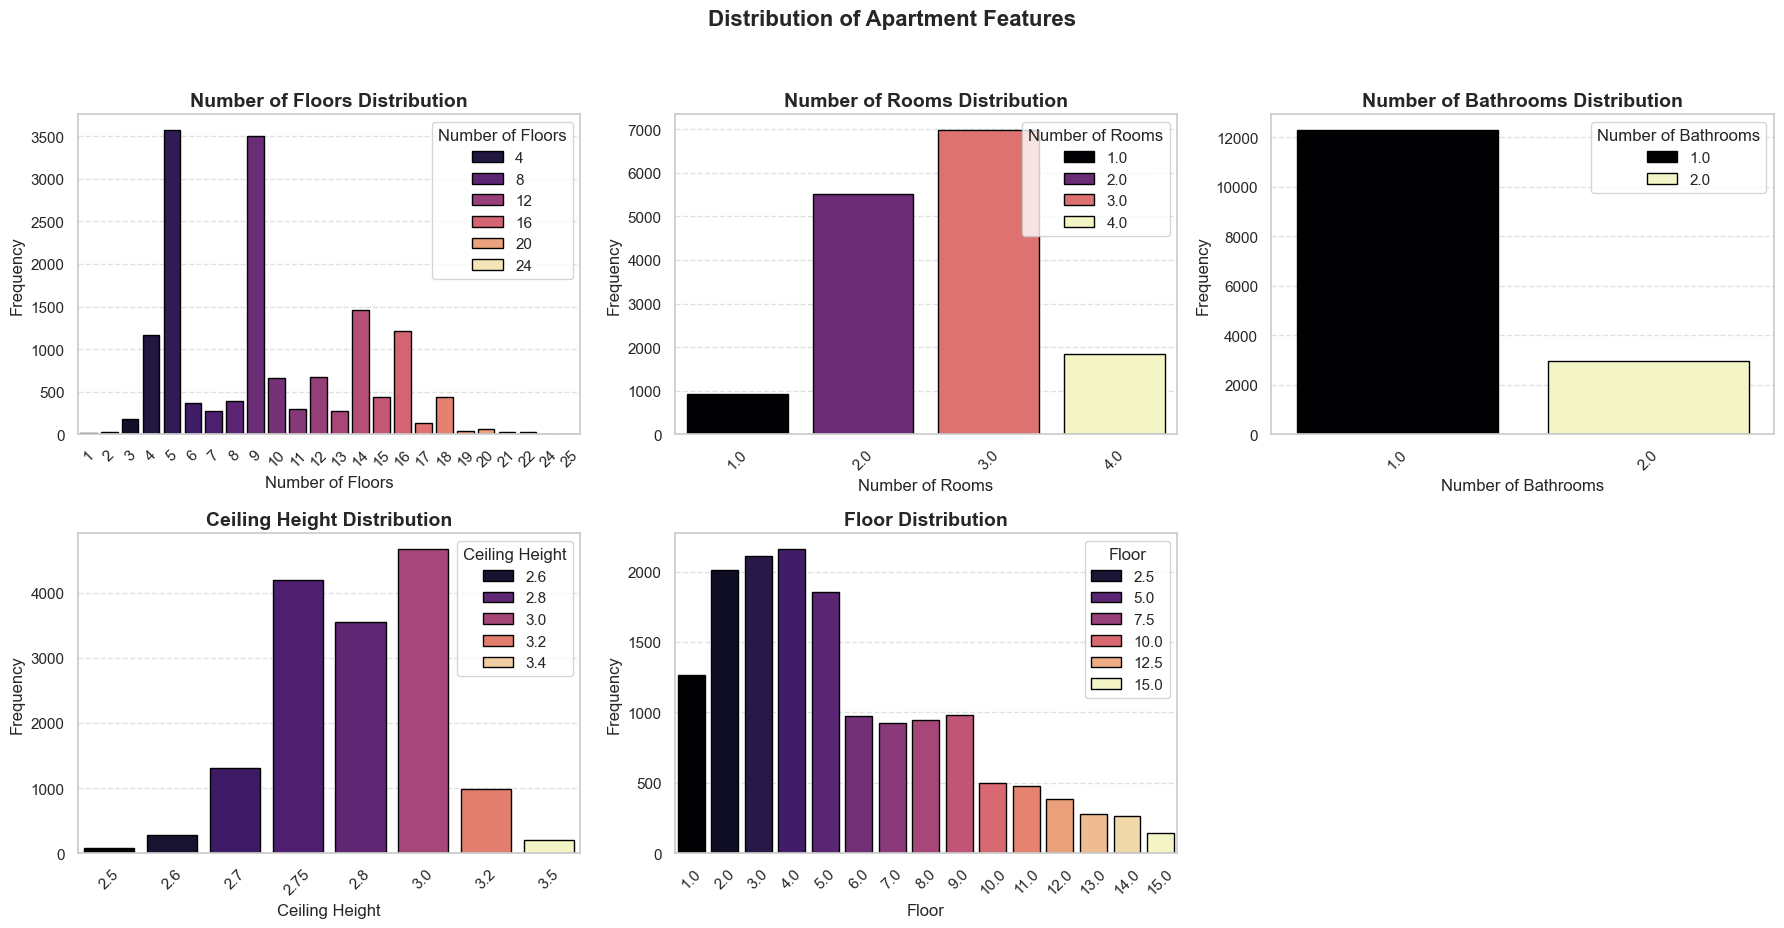

In [6]:
sns.set(style="whitegrid", context="notebook", palette="deep")

discrete_columns = [
    "Number of Floors", "Number of Rooms", "Number of Bathrooms",
    "Ceiling Height", "Floor"
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9))
axes = axes.flatten()

for idx, col in enumerate(discrete_columns):
    value_counts = df[col].value_counts().sort_index()
    temp_df = value_counts.reset_index()
    temp_df.columns = [col, "Count"]

    sns.barplot(
        data=temp_df,
        hue=col,
        x=col,
        y="Count",
        ax=axes[idx],
        palette="magma",
        edgecolor="black"
    )

    axes[idx].set_title(f"{col} Distribution", fontsize=14, fontweight="bold")
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel("Frequency", fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.6)

# Remove empty subplots
if len(discrete_columns) < len(axes):
    for j in range(len(discrete_columns), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle("Distribution of Apartment Features", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()

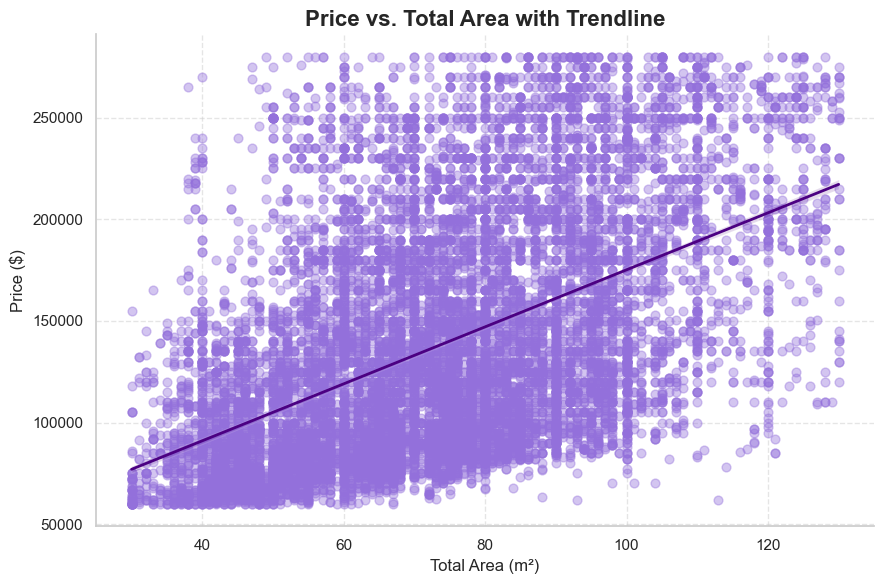

In [7]:
sns.set(style="whitegrid")

# Plot with purple tones
sns.lmplot(
    data=df,
    x="Total Area",
    y="Price",
    height=6,
    aspect=1.5,
    scatter_kws={"alpha": 0.4, "color": "mediumpurple", "s": 40},
    line_kws={"color": "indigo", "linewidth": 2}
)

# Improve titles and axes
plt.title("Price vs. Total Area with Trendline", fontsize=16, fontweight='bold')
plt.xlabel("Total Area (m²)", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

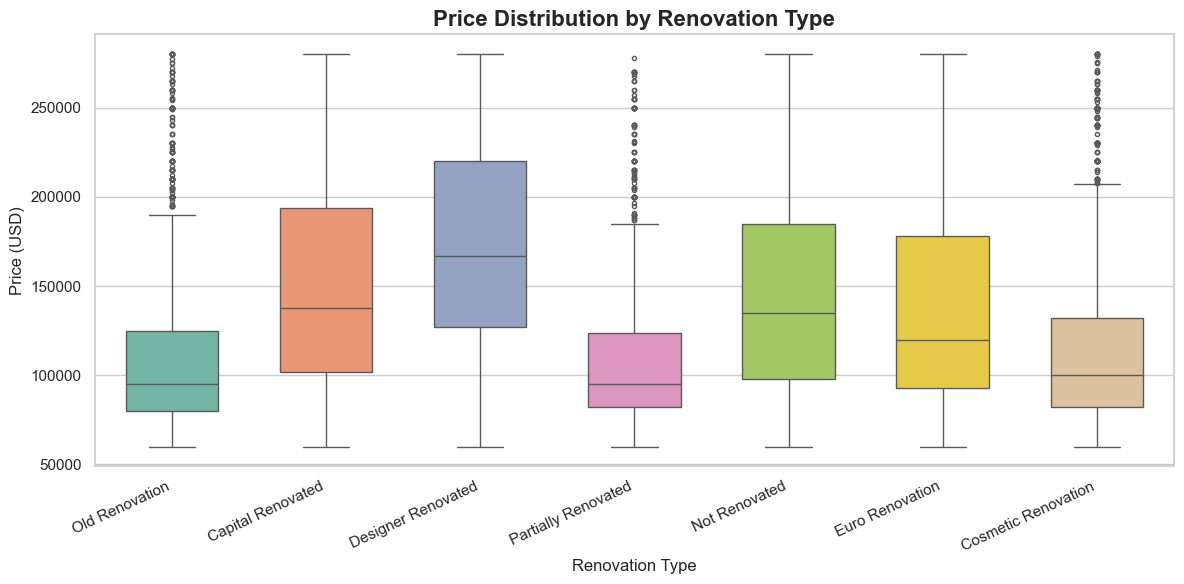

In [8]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.boxplot(
    data=df,
    x="Renovation",
    y="Price",
    hue="Renovation",         
    palette="Set2",
    width=0.6,
    fliersize=3,
    legend=False
)

plt.title("Price Distribution by Renovation Type", fontsize=16, weight='bold')
plt.xlabel("Renovation Type", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.xticks(rotation=25, ha='right', fontsize=11)
plt.tight_layout()
plt.show()

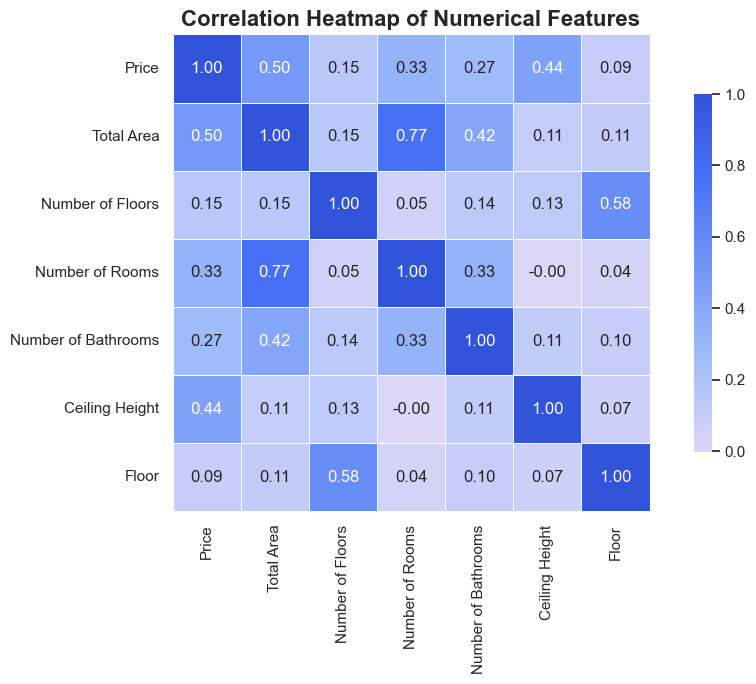

In [9]:
num_cols = [
    'Price',
    'Total Area',
    'Number of Floors',
    'Number of Rooms',
    'Number of Bathrooms',
    'Ceiling Height',
    'Floor'
]

corr_matrix = df[num_cols].corr()

# Create a custom pastel purple-blue colormap
pastel_cmap = LinearSegmentedColormap.from_list(
    "pastel_purple_blue",
    ["#dcd6f7", "#a3bffa", "#7698f7", "#4a73f7", "#3154db"]  # light purple to blue shades
)

plt.figure(figsize=(10, 7))
sns.set(style="white")

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=pastel_cmap,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .75}
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

In [10]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "notebook"  # կամ "browser"

fig = px.scatter_3d(
    data_frame=df,
    x="Total Area",
    y="Number of Rooms",
    z="Price",
    color="Renovation",
    size="Number of Bathrooms",
    hover_data=["District", "Building Type"],
    title="3D Scatter Plot: Price vs Total Area vs Number of Rooms",
    labels={"Total Area": "Total Area (m²)", "Number of Rooms": "Rooms", "Price": "Price (USD)"},
    width=1000,
    height=800
)

fig.show()

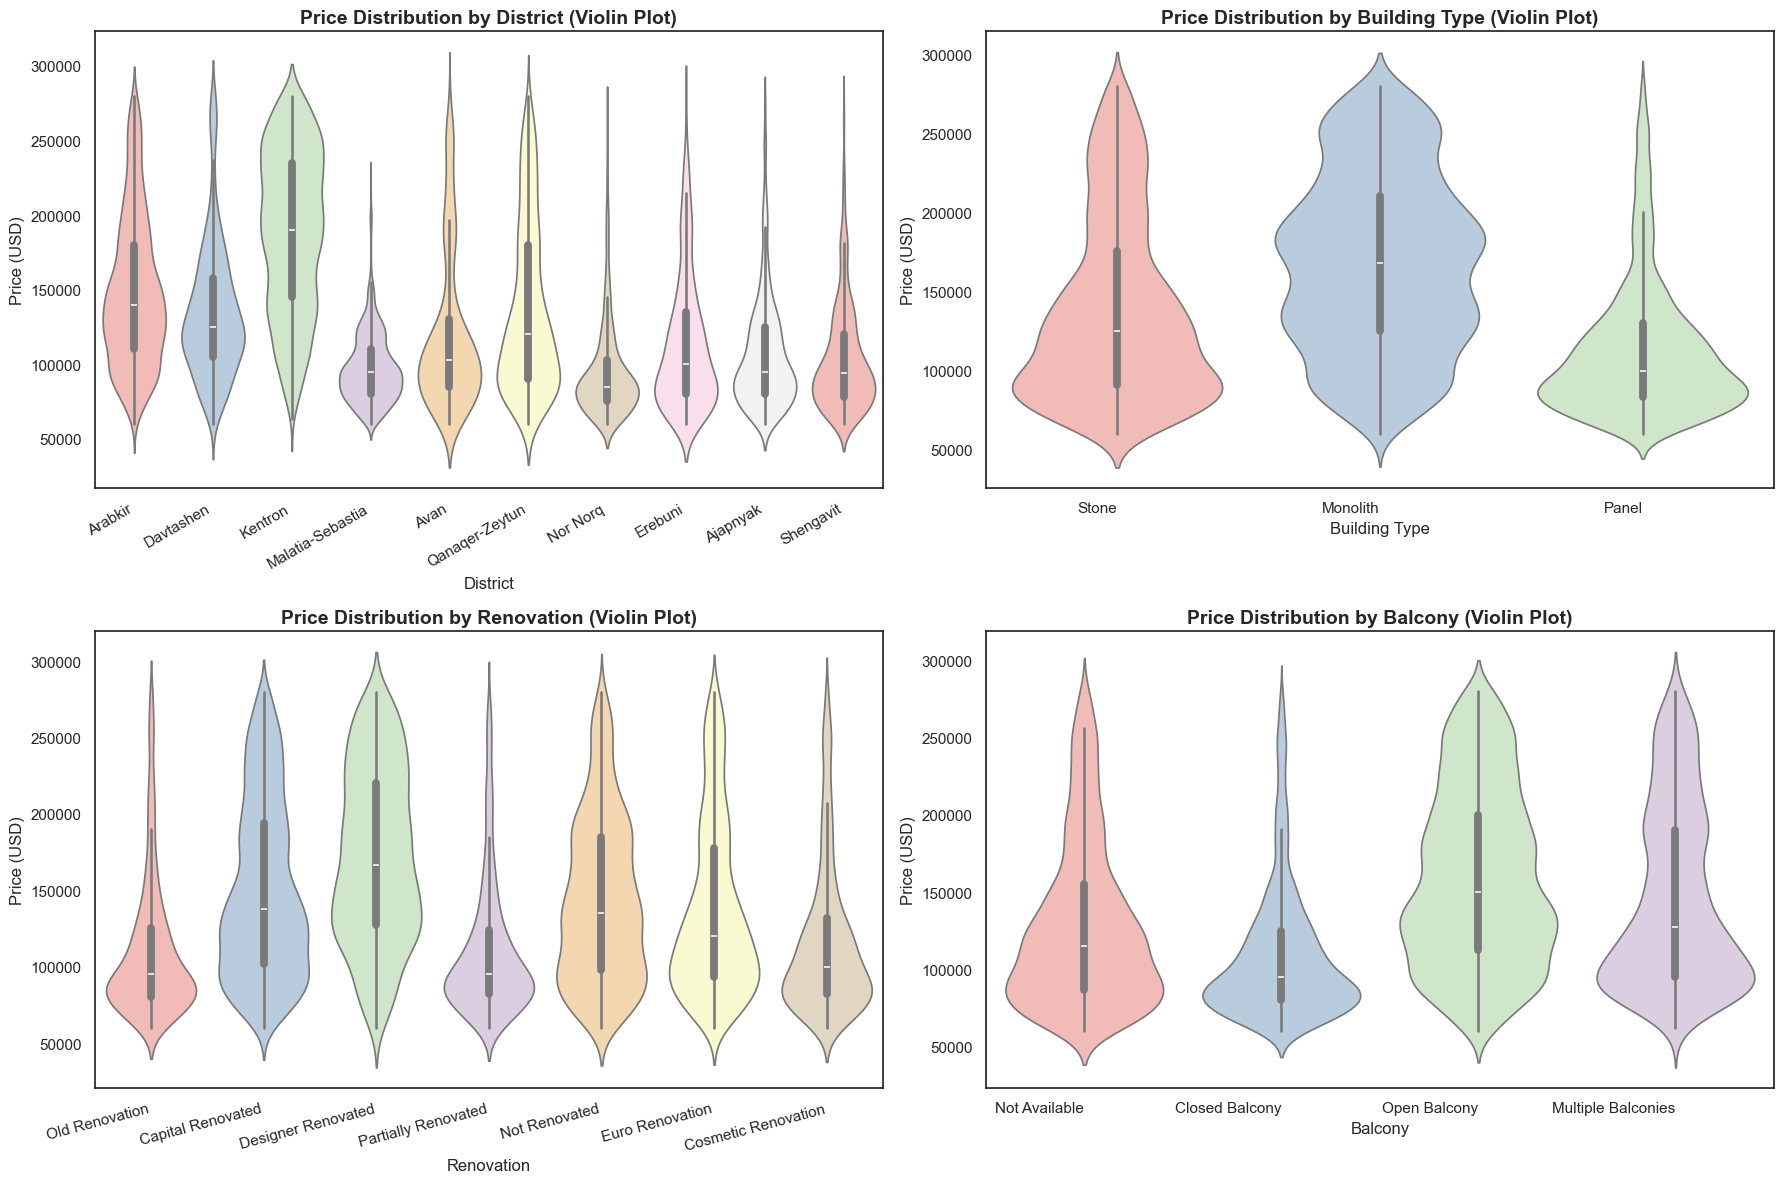

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# 1. Price Distribution by District
sns.violinplot(
    data=df,
    hue="District",
    x='District',
    y='Price',
    palette='Pastel1',
    legend=False,
    ax=axes[0]
)
plt.setp(axes[0].get_xticklabels(), rotation=30, ha='right')
axes[0].set_title("Price Distribution by District (Violin Plot)", fontsize=14, weight='bold')
axes[0].set_ylabel("Price (USD)", fontsize=12)

# 2. Price Distribution by Building Type
sns.violinplot(
    data=df,
    hue="Building Type",
    x='Building Type',
    y='Price',
    palette='Pastel1',
    legend=False,
    ax=axes[1]
)
plt.setp(axes[1].get_xticklabels(), rotation=0, ha='right')
axes[1].set_title("Price Distribution by Building Type (Violin Plot)", fontsize=14, weight='bold')
axes[1].set_ylabel("Price (USD)", fontsize=12)

# 3. Price Distribution by Renovation
sns.violinplot(
    data=df,
    hue="Renovation",
    x='Renovation',
    y='Price',
    palette='Pastel1',
    legend=False,
    ax=axes[2]
)
plt.setp(axes[2].get_xticklabels(), rotation=15, ha='right')
axes[2].set_title("Price Distribution by Renovation (Violin Plot)", fontsize=14, weight='bold')
axes[2].set_ylabel("Price (USD)", fontsize=12)

# 4. Price Distribution by Balcony
sns.violinplot(
    data=df,
    hue="Balcony",
    x='Balcony',
    y='Price',
    palette='Pastel1',
    legend=False,
    ax=axes[3]
)
plt.setp(axes[3].get_xticklabels(), rotation=0, ha='right')
axes[3].set_title("Price Distribution by Balcony (Violin Plot)", fontsize=14, weight='bold')
axes[3].set_ylabel("Price (USD)", fontsize=12)

plt.tight_layout()
plt.show()

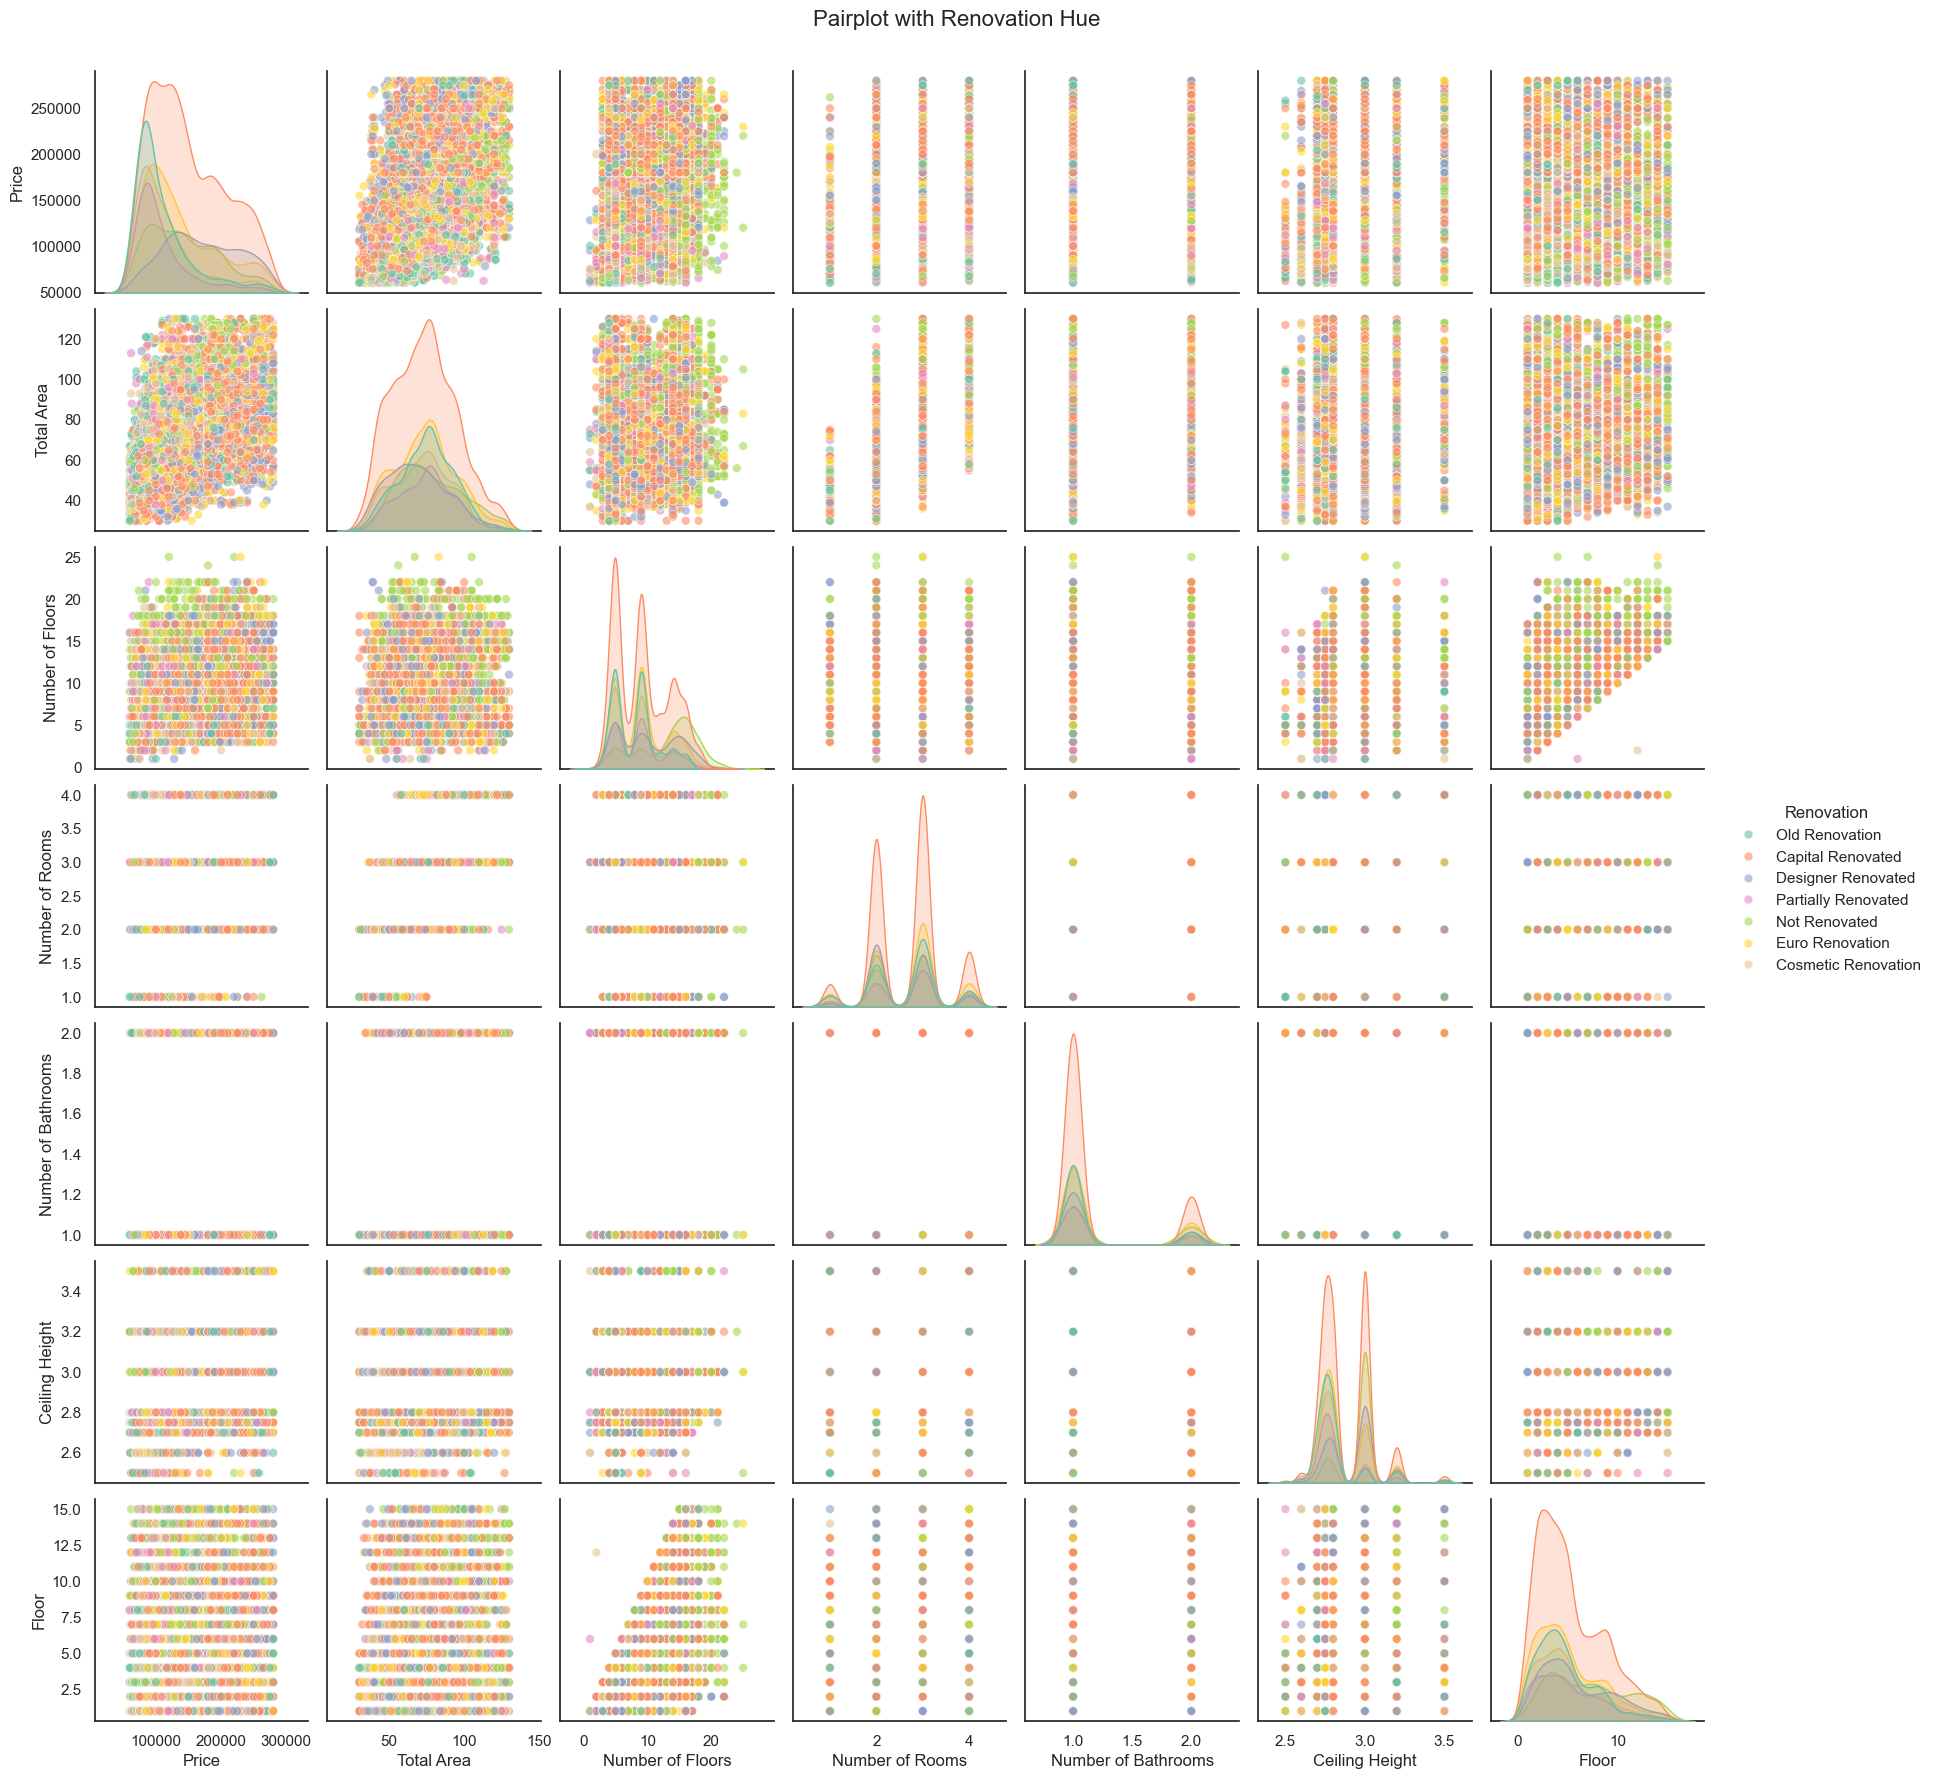

In [12]:
sns.pairplot(
    df[num_cols + ['Renovation']],
    hue='Renovation',
    diag_kind='kde',
    palette='Set2',
    plot_kws={'alpha':0.6, 's':40}
)
plt.suptitle("Pairplot with Renovation Hue", y=1.02, fontsize=16)
plt.show()